# Congestive heart failure detection using random forest classifier
#                             * University of Tehran *

# Author: "Sarmad Zandi"
# S.Number : 810199181  
# Date     : 2022-01-27
# Course   : Machine Learning
# =======================

# =========== PTB dataset ===========

In [ ]:
#Required libaries
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix as cf ,precision_recall_fscore_support as f1
import math
import numpy as np
import pandas as pd
%matplotlib inline
import csv
import pandas as pan
import numpy as np
#===========================================================================
# PTB dataset
# To Find 3 records
data = pan.read_csv("meta.csv")
data2 = data.loc[data["age"]==74]
data3 = data2.loc[data2["sex"]=="female"]
rec_1 = data3.loc[data2["Reason_for_admission"]=="Heart failure (NYHA 2)"]
record_1_PTB = rec_1.index[0]

data2 = data.loc[data["age"]==70]
data3 = data2.loc[data2["sex"]=="male"]
rec_2 = data3.loc[data2["Reason_for_admission"]=="Heart failure (NYHA 3)"]
record_2_PTB = rec_2.index[0]

data2 = data.loc[data["age"]==61]
data3 = data2.loc[data2["sex"]=="female"]
rec_3 = data3.loc[data2["Reason_for_admission"]=="Heart failure (NYHA 4)"]
record_3_PTB = rec_3.index[0]

dataset = [rec_1,rec_2,rec_3]
PTB_dataset = pan.concat(dataset)
print("First record is :",PTB_dataset.iloc[0][0])
print("===================================================================")
print("Second record is :",PTB_dataset.iloc[1][0])
print("===================================================================")
print("Third record is :",PTB_dataset.iloc[2][0])
#===========================================================================
# =========== PTB database ===========
p1 = pan.read_csv("PTB/patient115.csv")
p2 = pan.read_csv("PTB/patient118.csv")
p3 = pan.read_csv("PTB/patient123.csv")
# add label
p1["Heart_disease"] = 1
p2["Heart_disease"] = 1
p3["Heart_disease"] = 1
ress = [p1,p2,p3]
PTB_datasett = pan.concat(ress)
col = list(PTB_datasett.columns)

p1 = p1.to_numpy()
p2 = p2.to_numpy()
p3 = p3.to_numpy()

dataXX = np.concatenate((p1, p2, p3))
PTB_datasettt = pd.DataFrame(dataXX,columns=col)

f = list(PTB_datasettt.columns)
x = PTB_datasettt.loc[:, f].values
PTB_datasettt["Heart_disease"] = 1

#Standardize the Data
from sklearn.preprocessing import StandardScaler
y = PTB_datasettt.loc[:,['Heart_disease']].values
x = StandardScaler().fit_transform(x)

#PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
com = pca.fit_transform(x)
dff = pan.DataFrame(data = com, columns = ["ECG1", "ECG2"])
PTB_datasetttt = pan.concat([dff, PTB_datasettt[['Heart_disease']]], axis = 1)
print(PTB_datasetttt)

First record is : patient115
Second record is : patient118
Third record is : patient123
       ECG1      ECG2  Heart_disease
0 -1.490536  2.133266              1
1  4.879006 -0.489726              1
2 -3.388470 -1.643540              1


# =========== BIDMC database ===========

In [ ]:
# =========== BIDMC database ===========
datt = []
for i in range(1,16):
    locals()["datt"+str(i)] = pan.read_csv(f"bidmc/record{i}.csv")
    datt.append(locals()["datt"+str(i)])
BIDMC_dataset = pan.concat(datt)
col = list(BIDMC_dataset.columns)

for j in range(1,16):
    locals()["datt"+str(j)] = locals()["datt"+str(j)].to_numpy()

dataXX = np.concatenate((datt1,datt2,datt3,datt4,datt5,datt6,datt7,datt8,datt9,datt10,datt11,datt12,datt13,datt14,datt15))
BIDMC_datasett = pd.DataFrame(dataXX,columns=col)

BIDMC_datasett["Heart_disease"] = 1
BIDMC_datasett = BIDMC_datasett.iloc[:,1:]
print(BIDMC_datasett)

    'ECG1'  'ECG2'  Heart_disease
0   -0.470   0.715              1
1   -0.395  -0.160              1
2   -0.320  -0.305              1
3   -0.480  -0.260              1
4   -0.555   0.000              1
5   -0.300  -0.445              1
6   -0.515  -0.375              1
7   -0.370  -0.110              1
8    0.340   0.245              1
9   -0.415  -0.180              1
10  -0.640  -0.435              1
11  -0.265   0.075              1
12  -0.640  -0.195              1
13  -0.395  -0.045              1
14   0.010  -0.200              1


# =========== MIT database ===========

In [ ]:
# =========== MIT database ===========
datt = []
for i in [100,106,108,113,119,121,205,212,223,228,232,233,234]:
    locals()["daat"+str(i)] = pan.read_csv(f"mit/record{i}.csv")
    datt.append(locals()["daat"+str(i)])
MIT_dataset = pan.concat(datt)
col = list(MIT_dataset.iloc[:,:-1].columns)
for j in [100,106,108,113,119,121,205,212,223,228,232,233,234]:
    locals()["daat"+str(j)] = locals()["daat"+str(j)].to_numpy()

dataXX = np.concatenate((daat100,daat106,daat108,daat113,daat119,daat121,daat205,daat212,daat223,daat228,daat232,daat233,daat234))
MIT_datasett = pd.DataFrame(dataXX,columns=col)
MIT_datasett["Heart_disease"] = 0

f = list(MIT_datasett.columns)
x = MIT_datasett.loc[:, f].values
MIT_datasett["Heart_disease"] = 0

#Standardize the Data
from sklearn.preprocessing import StandardScaler
y = MIT_datasett.loc[:,['Heart_disease']].values
x = StandardScaler().fit_transform(x)

#PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
com = pca.fit_transform(x)
dff = pan.DataFrame(data = com, columns = ["ECG1", "ECG2"])
MIT_datasettt = pan.concat([dff, MIT_datasett[['Heart_disease']]], axis = 1)
print(MIT_datasettt)

        ECG1      ECG2  Heart_disease
0  -0.792224  0.397294              0
1  -0.986741 -0.534655              0
2   0.711975  1.990878              0
3  -0.510736 -0.729044              0
4   1.984567 -0.624809              0
5   2.106341  0.033279              0
6   0.873633  0.789404              0
7  -0.248048 -0.645127              0
8   1.167768 -1.151104              0
9  -0.704889  0.439936              0
10 -1.164487 -0.421898              0
11 -1.066427  0.346555              0
12 -1.370732  0.109290              0


# Final dataset (All together)

In [ ]:
# Final dataset (All together)
conc = [PTB_datasetttt,BIDMC_datasett,MIT_datasettt]
Final_dataset = pan.concat(conc)
col = list(Final_dataset.columns)
PTB_datasetttt = PTB_datasetttt.to_numpy()
BIDMC_datasett = BIDMC_datasett.to_numpy()
MIT_datasettt = MIT_datasettt.to_numpy()
dataXXX = np.concatenate((PTB_datasetttt, BIDMC_datasett, MIT_datasettt))
Final_datasett = pd.DataFrame(dataXXX,columns=col[0:3])
print(Final_datasett)

        ECG1      ECG2  Heart_disease
0  -1.490536  2.133266            1.0
1   4.879006 -0.489726            1.0
2  -3.388470 -1.643540            1.0
3  -0.470000  0.715000            1.0
4  -0.395000 -0.160000            1.0
5  -0.320000 -0.305000            1.0
6  -0.480000 -0.260000            1.0
7  -0.555000  0.000000            1.0
8  -0.300000 -0.445000            1.0
9  -0.515000 -0.375000            1.0
10 -0.370000 -0.110000            1.0
11  0.340000  0.245000            1.0
12 -0.415000 -0.180000            1.0
13 -0.640000 -0.435000            1.0
14 -0.265000  0.075000            1.0
15 -0.640000 -0.195000            1.0
16 -0.395000 -0.045000            1.0
17  0.010000 -0.200000            1.0
18 -0.792224  0.397294            0.0
19 -0.986741 -0.534655            0.0
20  0.711975  1.990878            0.0
21 -0.510736 -0.729044            0.0
22  1.984567 -0.624809            0.0
23  2.106341  0.033279            0.0
24  0.873633  0.789404            0.0
25 -0.248048

# Divide dataset into 2 part -> Train and Test

In [ ]:
X = Final_datasett.iloc[:,:-1]
Y=Final_datasett['Heart_disease']
Y=Y.astype('category')
Y=Y.cat.codes
#=====================================================
# divide dataset into 2 part -> Train,Test
def train_test__split(X, y = None, test_size = 0.4):
    train_size=1-test_size
    n_samples = X.shape[0]
    split_series = np.random.choice(a = ["train","test"], p = [train_size, test_size], size = n_samples)
    print(f'n_test:{np.sum(split_series=="test")}\nn_train:{np.sum(split_series=="train")}')
    split_series = pd.Series(split_series)
    X_train, X_test = X.iloc[split_series[split_series == "train"].index,:], X.iloc[split_series[split_series == "test"].index,:]
    if not y is None:
        y = pd.DataFrame(y,columns=['labels'])
        y_train, y_test = y.iloc[split_series[split_series == "train"].index,:], y.iloc[split_series[split_series == "test"].index,:]
        return X_train,X_test,y_train['labels'],y_test['labels']
    else:
        return X_train,X_test
#=====================================================
X_train, X_test, y_train, y_test = train_test_split(X,Y)


# Initial visualization of data

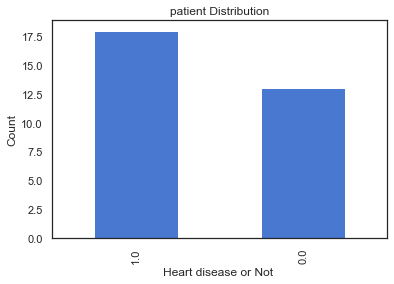

In [ ]:
#=====================================================
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Barplot for Class
Final_datasett['Heart_disease'].value_counts().plot(kind='bar')
plt.gca().set(title='patient Distribution',
            ylabel='Count',xlabel='Heart disease or Not ');
plt.show()
#=====================================================

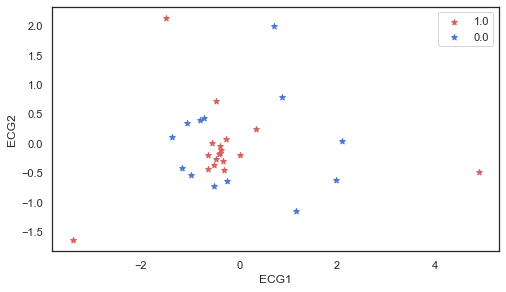

Total training samples: 23
Total   test   samples: 8


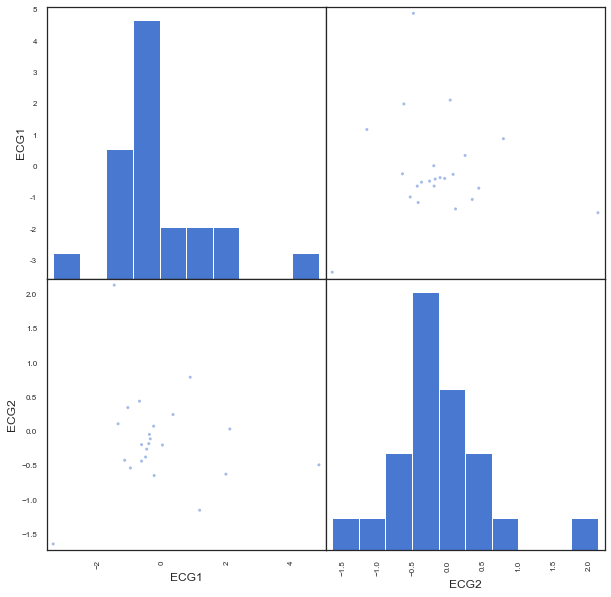

In [ ]:
#=====================================================
from matplotlib import pyplot as plt
# scatterplot for pair variables
column_names=['ECG1','ECG2']
labels=Final_datasett['Heart_disease']
labels = labels.astype('category')
labels = labels.values
ldict={1.0:'r',0.0:"b"}
length = len(column_names)
for i in range(length):
    for j in range(i+1,length):
        plt.figure(figsize=(8,4.5))
        x=Final_datasett[column_names[i]]
        y=Final_datasett[column_names[j]]
        for l in [1.0,0.0]:
            ix = np.where(labels==l)
            plt.scatter(x[ix[0]],y[ix[0]],c=ldict[l],label=l,marker='*')
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
        plt.legend()
        plt.show()
#=====================================================
print(f"Total training samples: {len(X_train)}")
print(f"Total   test   samples: {len(X_test)}")
sns.set(style="white", palette="muted", color_codes=True)
pd.plotting.scatter_matrix(X_train,figsize=(10,10));
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Calculate Confusion matrix

In [ ]:
#=====================================================
#calculate Confusion matrix and show function
def conf_mtx_plot(confusion_mtx,class_names,color_map='Purples'):
  fig=plt.figure(num=None, figsize=(5, 5), dpi=80,facecolor='w', edgecolor='k')
  ax = plt.axes()
  ax = sns.heatmap(confusion_mtx,ax=ax,annot=True,annot_kws={"size": 15},cmap=color_map,xticklabels=class_names,yticklabels=class_names,square=True)
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted labes')
  ax.set_ylabel('True labes')
  plt.yticks(rotation=0)
  plt.xticks(rotation=45)
  for _, spine in ax.spines.items():
    spine.set_visible(True)

  plt.savefig('Conf_mtx.png',bbox_inches='tight')
  plt.show()

from prettytable import PrettyTable as pt
def confusion_results(confusion_matrix,class_names=[0]):
    FP=confusion_matrix.sum(axis=0)- np.diag(confusion_matrix)
    FN=confusion_matrix.sum(axis=1)- np.diag(confusion_matrix)
    TP=np.diag(confusion_matrix)
    TN=confusion_matrix.sum()-(FP+FN+TP)

    support = confusion_matrix.sum(axis=1)
    recall   = np.round(TP/(TP+FN),2)
    precision= np.round(TP/(TP+FP),2)
    accuracy = np.round((TP+TN)/(TP+FP+FN+TN),2)
    support = np.reshape(support,(2,1))
    recall = np.reshape(recall,(2,1))
    precision = np.reshape(precision,(2,1))
    f1_score = np.round((2*recall*precision)/(recall+precision),2)
    results = pt(['','precision','recall','f1 score','support'])
    if len(class_names)<=1:
        for i in range(confusion_matrix.shape[0]):
            results.add_row([i,f'{precision[i][0]:.2f}',f'{recall[i][0]:.2f}',f'{f1_score[i][0]:.2f}',support[i][0]])
    else:
        for i in range(confusion_matrix.shape[0]):
            results.add_row([class_names[i],f'{precision[i][0]:.2f}',f'{recall[i][0]:.2f}',f'{f1_score[i][0]:.2f}',support[i][0]])
    print(results)
    print(f'Model accuracy : {np.max(accuracy)*100:.2f} %')
#=====================================================

====================== KNN ======================
[[1. 0.]
 [2. 5.]]
+-----+-----------+--------+----------+---------+
|     | precision | recall | f1 score | support |
+-----+-----------+--------+----------+---------+
| 1.0 |    0.33   |  1.00  |   0.50   |   1.0   |
| 0.0 |    1.00   |  0.71  |   0.83   |   7.0   |
+-----+-----------+--------+----------+---------+
Model accuracy : 75.00 %


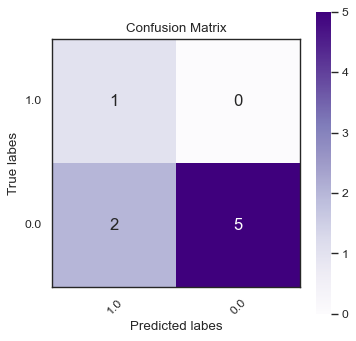

In [ ]:
#====================== KNN ======================
print("====================== KNN ======================")
k_nn = knn(n_neighbors=3,metric='euclidean')
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict_proba(X_test)[:,1]
threshold = 0.2
y_pred1 = (k_nn.predict_proba(X_test)[:, 1] > threshold).astype('int')
l = []
for i in range(len(y_pred1)):
    l.append([y_pred1[i]])
l = np.array(l)

confusion_matrix=np.zeros((2,2))
for i in range(l.shape[0]):
    confusion_matrix[l[i][0]][y_test.values[i]]+=1
print(confusion_matrix)
class_name=Final_datasett['Heart_disease'].unique()
confusion_results(confusion_matrix,class_name)
conf_mtx_plot(confusion_matrix,class_name)

====================== Support Vector  ======================
[[3. 1.]
 [0. 4.]]
+-----+-----------+--------+----------+---------+
|     | precision | recall | f1 score | support |
+-----+-----------+--------+----------+---------+
| 1.0 |    1.00   |  0.75  |   0.86   |   4.0   |
| 0.0 |    0.80   |  1.00  |   0.89   |   4.0   |
+-----+-----------+--------+----------+---------+
Model accuracy : 88.00 %


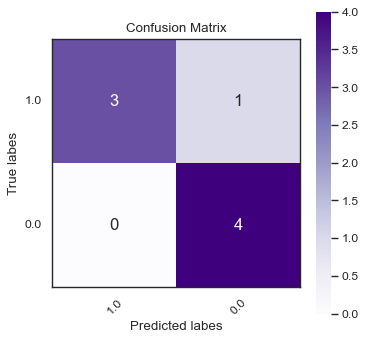

In [ ]:
#====================== SVM  ======================
print("====================== Support Vector  ======================")
SVM = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict_proba(X_test)[:,1]
threshold = 0.5
y_pred1 = (SVM.predict_proba(X_test)[:, 1] > threshold).astype('int')
l = []
for i in range(len(y_pred1)):
    l.append([y_pred1[i]])
l = np.array(l)

confusion_matrix=np.zeros((2,2))
for i in range(l.shape[0]):
    confusion_matrix[l[i][0]][y_test.values[i]]+=1
print(confusion_matrix)
class_name=Final_datasett['Heart_disease'].unique()
confusion_results(confusion_matrix,class_name)
conf_mtx_plot(confusion_matrix,class_name)

====================== Multi-layer perceptron ======================
[[2. 1.]
 [1. 4.]]
+-----+-----------+--------+----------+---------+
|     | precision | recall | f1 score | support |
+-----+-----------+--------+----------+---------+
| 1.0 |    0.67   |  0.67  |   0.67   |   3.0   |
| 0.0 |    0.80   |  0.80  |   0.80   |   5.0   |
+-----+-----------+--------+----------+---------+
Model accuracy : 75.00 %


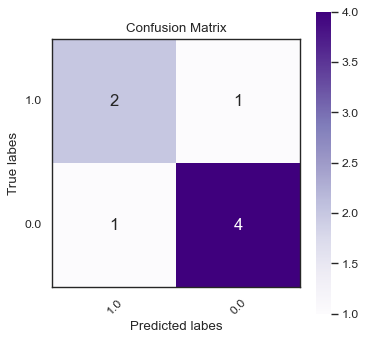

In [ ]:
#====================== Multi-layer perceptron (ANN) ======================
print("====================== Multi-layer perceptron ======================")
MLP = classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)
MLP.fit(X_train, y_train)
y_pred = MLP.predict_proba(X_test)[:,1]
threshold = 0.5
y_pred1 = (MLP.predict_proba(X_test)[:, 1] > threshold).astype('int')
l = []
for i in range(len(y_pred1)):
    l.append([y_pred1[i]])
l = np.array(l)

confusion_matrix=np.zeros((2,2))
for i in range(l.shape[0]):
    confusion_matrix[l[i][0]][y_test.values[i]]+=1
print(confusion_matrix)
class_name=Final_datasett['Heart_disease'].unique()
confusion_results(confusion_matrix,class_name)
conf_mtx_plot(confusion_matrix,class_name)

====================== Random Forest  ======================
[[3. 0.]
 [0. 5.]]
+-----+-----------+--------+----------+---------+
|     | precision | recall | f1 score | support |
+-----+-----------+--------+----------+---------+
| 1.0 |    1.00   |  1.00  |   1.00   |   3.0   |
| 0.0 |    1.00   |  1.00  |   1.00   |   5.0   |
+-----+-----------+--------+----------+---------+
Model accuracy : 100.00 %


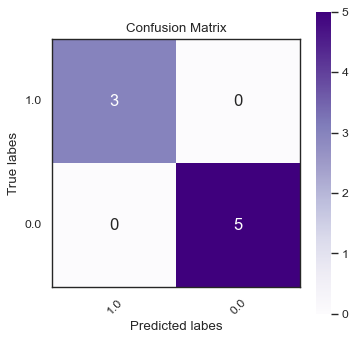

In [ ]:
#====================== Random Forest  ======================
print("====================== Random Forest  ======================")
Random_forest = classifier3 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 20,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)
Random_forest.fit(X_train, y_train)
y_pred = Random_forest.predict_proba(X_test)[:,1]
threshold = 0.50
y_pred1 = (Random_forest.predict_proba(X_test)[:, 1] > threshold).astype('int')
l = []
for i in range(len(y_pred1)):
    l.append([y_pred1[i]])
l = np.array(l)

confusion_matrix=np.zeros((2,2))
for i in range(l.shape[0]):
    confusion_matrix[l[i][0]][y_test.values[i]]+=1
print(confusion_matrix)
class_name=Final_datasett['Heart_disease'].unique()
confusion_results(confusion_matrix,class_name)
conf_mtx_plot(confusion_matrix,class_name)

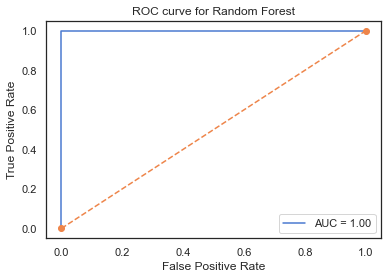

In [ ]:
#=====================================================
# for plot ROC AUC
def labelEncoder(labels):
    size=len(np.unique(labels))
    label=np.unique(labels)
    enlabels=dict(list(enumerate(label)))
    enlabels={y:x for x,y in enlabels.items()}
    coded=[enlabels[i]for i in labels]
    return size,label,np.array(coded)

from sklearn.metrics import roc_curve, roc_auc_score,plot_roc_curve,plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay

_,_,y_test_numerical = labelEncoder(y_test)
_,_,y_pred_numerical = labelEncoder(y_pred1)

for i in range(1):
    y_test_bin = np.int32(y_test_numerical==i)
    y_pred_bin = np.int32(y_pred_numerical==i)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
    rocauc=roc_auc_score(y_test_bin,y_pred_bin)
    RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=rocauc).plot()
    plt.title("ROC curve for Random Forest")
    plt.plot([0,1],[0,1],'o--')
    plt.savefig(f'roc_{class_name[i]}.png',bbox_inches='tight')
#=====================================================

====================== Decision Tree  ======================
[[3. 0.]
 [0. 5.]]
+-----+-----------+--------+----------+---------+
|     | precision | recall | f1 score | support |
+-----+-----------+--------+----------+---------+
| 1.0 |    1.00   |  1.00  |   1.00   |   3.0   |
| 0.0 |    1.00   |  1.00  |   1.00   |   5.0   |
+-----+-----------+--------+----------+---------+
Model accuracy : 100.00 %


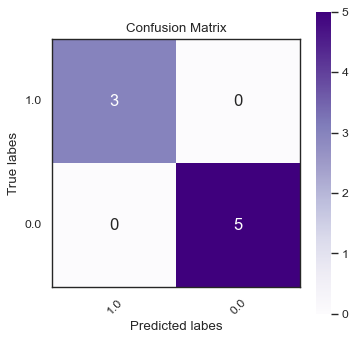

In [ ]:
#====================== Decision Tree  ======================
print("====================== Decision Tree  ======================")
DT = DecisionTreeClassifier(random_state=1000)
DT.fit(X_train, y_train)
y_pred = DT.predict_proba(X_test)[:,1]
threshold = 0.5
y_pred1 = (DT.predict_proba(X_test)[:, 1] > threshold).astype('int')
l = []
for i in range(len(y_pred1)):
    l.append([y_pred1[i]])
l = np.array(l)

confusion_matrix=np.zeros((2,2))
for i in range(l.shape[0]):
    confusion_matrix[l[i][0]][y_test.values[i]]+=1
print(confusion_matrix)
class_name=Final_datasett['Heart_disease'].unique()
confusion_results(confusion_matrix,class_name)
conf_mtx_plot(confusion_matrix,class_name)